In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

from sklearn.cluster import KMeans
from matplotlib.backends.backend_pdf import PdfPages


def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

In [6]:
def nor_data(data2, method):
    if method == 0:
        return (data2 - data2.min())/(data2.max() - data2.min()) ##rescaling
    
    if method == 1:
        return (data2 - data2.mean())/(data2.max() - data2.min()) ##mean normalization
    
    if method == 2:
        return (data2-data2.mean())/(data2.std()) ##standarization


In [13]:
def kmenas(filename, clusternumber, savefile = False, saveplot = False, method = 0):
    data = pd.read_csv(filename)
    data2 = pd.DataFrame(data, columns = ['rndinten', 'expinten'])
    data2 = nor_data(data2, method)
    #print(data2.head()) 
    pdf = PdfPages('cut_figure.pdf')         #先创建一个pdf文件
    
    sns.set(context="notebook", style="white")
    sns.lmplot('rndinten', 'expinten', data=data2, fit_reg=False)
    plt.show()
    plt.close()
    #################
    sk_kmeans = KMeans(n_clusters=clusternumber)
    sk_kmeans.fit(data2)

    ##produce cluster label
    sk_C = sk_kmeans.predict(data2)

    #combine label
    data_with_c = combine_data_C(data, sk_C)
    data_with_c2 = combine_data_C(data2, sk_C)
    #print(data_with_c)

    ##File Output
    outpath = filename.split(".")[0]
    if(savefile):
        data_with_c.to_csv(outpath+"_withcluster"+str(clusternumber)+".csv")

    #result plot
    #plt.figure()
    sns.lmplot('rndinten', 'expinten', hue='C', data=data_with_c2, fit_reg=False)
    plt.title(outpath+"_method"+str(method))
    plt.tight_layout()
    if (saveplot):
        plt.savefig("./outplot/"+outpath+"_c" +str(clusternumber)+"_method"+str(method)+".png", dpi = 500)
    plt.show()
    
    pdf.savefig()                            #将图片保存在pdf文件中
    plt.close()
    pdf.close()
    return

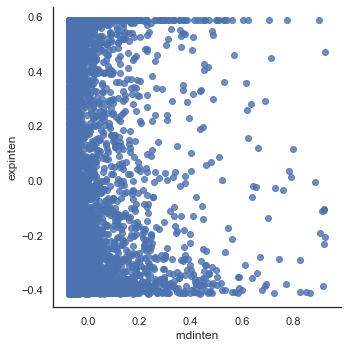

<Figure size 432x288 with 0 Axes>

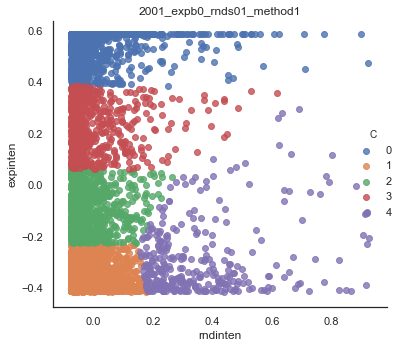

ValueError: No figure None

In [14]:
filep = "2001_expb0_rnds01.csv"
n = 5

for i in [1,2]:
    kmenas(filep, n, 0, 0, i)

